## Importing necessary python libraries

In [41]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data

In [42]:
data= pd.read_csv("emp_rating.csv")

In [43]:
data.head()

,Emp Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,Emp_1,2,77,79,69,68,95
1,Emp_2,2,62,76,76,69,68
2,Emp_3,2,50,97,87,50,75
3,Emp_4,2,68,77,95,76,61
4,Emp_5,2,98,54,59,95,86


## We can see that we have only numerical variables and emp_id is just a unique identification number of the employee. Lets set it as index

In [44]:
data.set_index('Emp Id',inplace = True)

### descriptive stats of the dataset

In [45]:
data.describe()

,Sports,Religious,Nature,Theatre,Shopping,Picnic
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,11.987952,109.779116,124.518072,116.377510,112.638554,120.401606
std,6.616501,32.454115,45.639372,32.132696,41.562888,32.633339
min,2.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,6.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,12.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,18.000000,132.000000,153.000000,138.000000,138.000000,143.000000
max,25.000000,203.000000,318.000000,213.000000,233.000000,218.000000


## Visualize the spread of the variables using a boxplot

Text(0.5, 0.98, 'BOXPLOTS TO CHECK THE SPREAD OF VARIABLES')

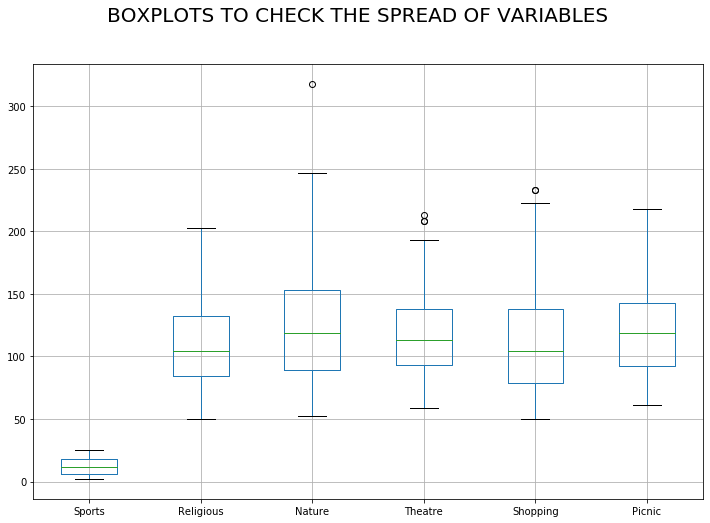

In [46]:
data.boxplot(figsize = (12,8), grid = True)
plt.suptitle('BOXPLOTS TO CHECK THE SPREAD OF VARIABLES', size = 20)

## Question-1: Do you find any difference in the scale of the variables? Is there an exception? Write your observations from the boxplots.


### <font color='Blue'> Yes, we can clearly a exception in the variables, there is difference in scale of the attribute <font color='Red'>'Sports'</font> from other variables.</font>

### <font color='Blue'>Boxplots is a good technique to find out the variability, exceptions and outiers in the dataset.</font>

### <font color='Blue'>We can see from the boxplot and the descriptive stats of the data mentioned above that :</font>

#### <font color='Blue'>1. Columns Religious , Nature, Theatre, Shopping and Picnic have starting values somewhere between (50-61) and end up between (200-320) .</font>
#### <font color='Blue'>2. Column Sports however starts from vaue 2 and the maximum is 25.</font>
#### <font color='Blue'>3. Average values of Religious , Nature, Theatre, Shopping and Picnic are between (100-120).</font>
#### <font color='Blue'>4. Nature, Theater and Shopping have a very few outliers as well.</font>

## <font color='Blue'>So the scale for <font color='Red'>'Sports'</font> column in this case is invariable and needs adjustment. </font>


## Lets check the co-relation matrix to understand the relationships

(6.5, -0.5)

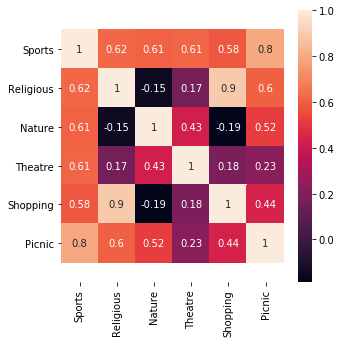

In [47]:
plt.figure(figsize = (10,8) )
ax = sns.heatmap(data.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Question-2: What patterns do you observe here? What insights can you draw from the exploratory data analysis so far?


### <font color='Blue'> Below are the patterns that are observed : </font>

### <font color='Blue'> We can see that the correlation coefficient for Religious and Shopping is 0.9, therefore we can say that there is a very strong positive correlation between Religious and Shopping.</font>

### <font color='Blue'> We can see that the second highest correlation is between Picnic and Sports which is 0.8 we can say that there is a strong positive correlation between Picnic and Sports as well.

### <font color='Blue'> We can see that there is Very Weak or Negligible Negative correlation between Religious-Nature(-0.15) Rating and Nature-Shopping(-0.19) </font>

### <font color='Blue'> For Sports we can say that there is a Moderate to Very High Positive correlation with almost all the columns in the dataset</font>
	
### <font color='Blue'> Insights that can be drawn from above are : </font>

#### <font color='Blue'> 1. Employees who have rated high for Religious Activity have also rated high for Shopping coupons therefore we can analyse that there are the employees who are of higher age and like to either shop for their homes or needs , else would like to go for religious activity in their liesure time.  </font>
	
#### <font color='Blue'> 2. Employees who have rated high for Picnic have also rated high for Sports Activity therefore we can analyse that there are the employees who are of young to mid age and would like to go on a picnic and also play some sport or need sports coupons.  </font>

#### <font color='Blue'> 3. Employees who want to have a religious activity or coupon do not want to travel or rate for Nature, same is with Nature and Shopping, the employees who want to travel or look into Nature have rated less for Shopping coupons. </font>

#### <font color='Blue'> 4. Sports we can see has a common foreground with all the other columns here and have a mid to average relation with other activities therefore it can be inferred that Sports is a likelyhood to have with other activities or coupons.  </font>
	

In [48]:
from sklearn.preprocessing import MinMaxScaler

data_copy = data[:]
scaler = MinMaxScaler()
data_copy[data_copy.columns] = scaler.fit_transform(data_copy)

Text(0.5, 0.98, 'BOXPLOTS TO CHECK THE SPREAD OF VARIABLES')

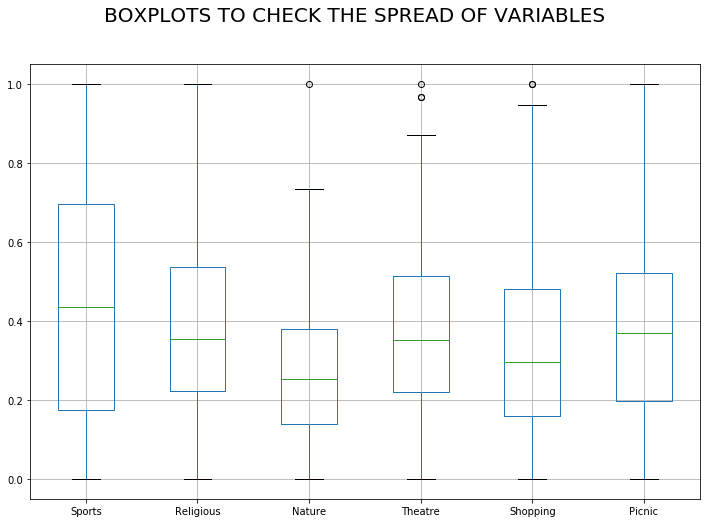

In [49]:
data_copy.boxplot(figsize = (12,8), grid = True)
plt.suptitle('BOXPLOTS TO CHECK THE SPREAD OF VARIABLES', size = 20)

## Question-3: What did we do here? Why did we do it? 

### <font color='Blue'> The process which is done here is called Feature Scaling and here we are doing Normalization using Min Max Scaling, it is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. </font>

### <font color='Blue'>To answer why do we do it we first need to understand the Practical Condsiderations of Clustering(K-Means), below :</font>

#### <font color='Blue'> 1.You need to bring all the attributes to same scale, this can be done be done by standardization or normalization. :</font>
#### <font color='Blue'> 2.Clustering process is sensetive to the presence of outliers in data :</font>
#### <font color='Blue'>3. We have seen in Answer 1 'Sports' variable needed some scaling, therefore we did this step.</font>

### <font color='Blue'> Considering the above practical considerations for clustering we need to process the data in such a way that whole numerical data is in same scale and there is no outliers, therefore the above process is done in this step.</font>




### `Hopkins Statistic`

In [1]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def my_hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [2]:
my_hopkins(data_copy)

NameError: name 'data_copy' is not defined

## Question-4: According to Hopkins Statistic is there cluster tendency in the data?

### <font color='Blue'> Hopkins Statistics is a test which is used to quantify the clustering tendency of a given dataset. Values ranges and the insights provided by the ranges are below:</font>

#### <font color='Blue'> 0.19 - Clustering is useless and there is no insight that can be drawn.</font>
#### <font color='Blue'> 0.31 - Clustering and insights are Questionable.</font>
#### <font color='Blue'> 0.51 - Clustering is useul and there can be relevant insights drawn from the data</font>

### <font color='Blue'> In the above case the Hopkins Statistics value is 0.8 therefore we can say that the data has clustering tendency, i.e clustering is useful here and there can be insights drawn from this dataset.</font>

## Model building - KMeans

In [ ]:
from sklearn.cluster import KMeans

### Choosing K by comparing Cost against each K¶

In [ ]:
import pylab as pl
number_of_clusters = range(1,5)
kmeans = [KMeans(n_clusters=i,max_iter=1000,random_state=42) for i in number_of_clusters]
score = [-1*kmeans[i].fit(data_copy).score(data_copy) for i in range(len(kmeans))]
pl.plot((number_of_clusters),score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## According to the Elbow Curve the optimum No of Clusters is 2. But, your management plans 3 different types of incentives to give to the customers. Hence we will be running K-Means with number of clusters as 3

## Question-5: Write the code for creating the KMeans clusters with number of clusters = 3.

### Hint: Use the function KMeans(n_clusters= no. of clusters ,max_iter=1000,random_state=42)

In [ ]:
km =KMeans(n_clusters=3,max_iter=1000,random_state=42)
fitClusters = km.fit_predict(data_copy)

### Combining the predicted clusters with the original DF.¶

In [ ]:
copy_2 = data_copy.reset_index()
clustersDf = pd.DataFrame(fitClusters)
data['k_mean_pred'] = fitClusters
clustersDf.columns = ['k_mean_pred']
combinedDf = pd.concat([copy_2, clustersDf], axis = 1)
combinedDf.set_index('Emp Id',inplace = True)
combinedDf.head()

## Analysing the segments based on the clusters created by K-means clustering Model

In [ ]:
temp = ['K means clustering'] 
a = 0
for x in  ['k_mean_pred']:
    plt.figure(figsize = (15,8))
    c = 1
    for variables in  data.columns[:-1]:
        plt.subplot(2,3,c)
        sns.boxplot(x= x, y= variables , data= data)
        c +=1

        plt.subplots_adjust(wspace=0.50)
    plt.suptitle('Different Segments of Employees - ' + temp[a])
    a +=1

## Now that the segments have been created, we need to profile each segment for reporting

## Question-6: What are the major differences between Employee Segment 0 and Employee Segment 1?

### <font color='Blue'>Changed the code "for variables in  data.columns[:-2]:" to "for variables in  data.columns[:-1]:" as the Picnic boxlot was not visible. Changed the code and wrote insights.</font>

### <font color='Blue'>There are 3 Clusters which are made from the data above, below is the difference between Employee Segment 0 and Employee Segment 1 </font>

#### <font color='Blue'> Employee Segment 0 highly pefers or have given higher rating to Sports, Religious Activity, Picnic and Shopping coupons.</font>
#### <font color='Blue'> Employee Segment 1 prefers to Travel(Nature) and Theatre Activity(Movie coupons etc)</font>
#### <font color='Blue'> Employee Segment 0 consist of mid aged to more aged individuals who prefer Shopping, Religious activity and Picnic with office friends and families and sometimes Sports</font>
#### <font color='Blue'> Employee Segment 1 is preferably very young employees who either want to Travel with friends or go to watch Theater.</font>

## Question-7: Which of the employee segments does not show much interest in any kind of leisure activity or entertainment ?

### <font color='Blue'> Employee Segment 2 is the cluster which does not show much interest in any kind of leisure activity or entertainment, it can be easily inferred from the box plots of the employee cluster above.</font>

### <font color='Blue'> Employee Segment 2 has rated low for all the activities therefore this segment is the most uninterested ones.</font>
